In [1]:
import sys, os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
sys.path.append('../..')
from src import raw_data_path, direcslist, load_image, ImageQuant2, bounded_mean_1d, dosage
%matplotlib widget

In [2]:
# Specify paths
path = raw_data_path + '/Imaging/ring_ph'
paths = direcslist(path, 1)
lines = [p.strip('/').split('/')[-2].split('_')[1] for p in paths]
conditions = [p.strip('/').split('/')[-2].split('_')[2] for p in paths]

# Import data
imgs = [load_image(p + '/af_corrected.tif') for p in paths]
rois = [np.loadtxt(p + '/ROI_fit.txt') for p in paths]

# Import quantification model
membg = np.loadtxt('../../data/calibration_mem6.txt')
cytbg = np.loadtxt('../../data/calibration_cyt.txt')
calibration_factor = np.loadtxt('../../data/calibration_constants.txt')[6]
print(calibration_factor)

3.128136976235888


  0%|                                                                                                                      | 0/600 [00:00<?, ?it/s]

  0%|▏                                                                                                             | 1/600 [00:00<06:28,  1.54it/s]

  2%|█▋                                                                                                            | 9/600 [00:00<00:38, 15.44it/s]

  3%|███                                                                                                          | 17/600 [00:00<00:20, 27.91it/s]

  4%|████▌                                                                                                        | 25/600 [00:00<00:15, 38.24it/s]

  5%|█████▊                                                                                                       | 32/600 [00:01<00:12, 44.61it/s]

  6%|███████                                                                                                      | 39/600 [00:01<00:11, 49.67it/s]

  8%|████████▎                                                                                                    | 46/600 [00:01<00:10, 52.90it/s]

  9%|█████████▋                                                                                                   | 53/600 [00:01<00:09, 55.55it/s]

 10%|██████████▉                                                                                                  | 60/600 [00:01<00:09, 57.69it/s]

 11%|████████████▎                                                                                                | 68/600 [00:01<00:08, 61.38it/s]

 12%|█████████████▋                                                                                               | 75/600 [00:01<00:08, 60.31it/s]

 14%|██████████████▉                                                                                              | 82/600 [00:01<00:09, 56.34it/s]

 15%|███████████████▉                                                                                             | 88/600 [00:02<00:09, 54.25it/s]

 16%|█████████████████                                                                                            | 94/600 [00:02<00:09, 53.88it/s]

 17%|██████████████████                                                                                          | 100/600 [00:02<00:09, 54.28it/s]

 18%|███████████████████▎                                                                                        | 107/600 [00:02<00:08, 58.08it/s]

 19%|████████████████████▌                                                                                       | 114/600 [00:02<00:07, 61.10it/s]

 20%|█████████████████████▊                                                                                      | 121/600 [00:02<00:08, 57.15it/s]

 21%|██████████████████████▊                                                                                     | 127/600 [00:02<00:08, 54.93it/s]

 22%|███████████████████████▉                                                                                    | 133/600 [00:02<00:08, 54.19it/s]

 24%|█████████████████████████▌                                                                                  | 142/600 [00:02<00:07, 61.70it/s]

 25%|██████████████████████████▊                                                                                 | 149/600 [00:03<00:07, 63.77it/s]

 26%|████████████████████████████                                                                                | 156/600 [00:03<00:06, 64.80it/s]

 27%|█████████████████████████████▎                                                                              | 163/600 [00:03<00:06, 65.71it/s]

 28%|██████████████████████████████▌                                                                             | 170/600 [00:03<00:06, 66.76it/s]

 30%|███████████████████████████████▊                                                                            | 177/600 [00:03<00:06, 67.23it/s]

 31%|█████████████████████████████████                                                                           | 184/600 [00:03<00:06, 64.09it/s]

 32%|██████████████████████████████████▍                                                                         | 191/600 [00:03<00:06, 60.96it/s]

 33%|███████████████████████████████████▋                                                                        | 198/600 [00:03<00:07, 53.54it/s]

 34%|████████████████████████████████████▋                                                                       | 204/600 [00:03<00:07, 52.89it/s]

 35%|█████████████████████████████████████▊                                                                      | 210/600 [00:04<00:07, 53.92it/s]

 36%|███████████████████████████████████████                                                                     | 217/600 [00:04<00:06, 56.53it/s]

 37%|████████████████████████████████████████▎                                                                   | 224/600 [00:04<00:06, 58.61it/s]

 38%|█████████████████████████████████████████▌                                                                  | 231/600 [00:04<00:06, 60.73it/s]

 40%|██████████████████████████████████████████▊                                                                 | 238/600 [00:04<00:05, 63.18it/s]

 41%|████████████████████████████████████████████                                                                | 245/600 [00:04<00:05, 64.81it/s]

 42%|█████████████████████████████████████████████▎                                                              | 252/600 [00:04<00:05, 66.04it/s]

 43%|██████████████████████████████████████████████▌                                                             | 259/600 [00:04<00:05, 66.72it/s]

 44%|████████████████████████████████████████████████                                                            | 267/600 [00:04<00:04, 68.80it/s]

 46%|█████████████████████████████████████████████████▌                                                          | 275/600 [00:05<00:04, 70.07it/s]

 47%|██████████████████████████████████████████████████▉                                                         | 283/600 [00:05<00:04, 69.94it/s]

 48%|████████████████████████████████████████████████████▍                                                       | 291/600 [00:05<00:04, 69.33it/s]

 50%|█████████████████████████████████████████████████████▊                                                      | 299/600 [00:05<00:04, 69.98it/s]

 51%|███████████████████████████████████████████████████████▎                                                    | 307/600 [00:05<00:04, 70.34it/s]

 52%|████████████████████████████████████████████████████████▋                                                   | 315/600 [00:05<00:04, 67.12it/s]

 54%|█████████████████████████████████████████████████████████▉                                                  | 322/600 [00:05<00:04, 63.71it/s]

 55%|███████████████████████████████████████████████████████████▏                                                | 329/600 [00:05<00:04, 60.37it/s]

 56%|████████████████████████████████████████████████████████████▍                                               | 336/600 [00:06<00:04, 56.19it/s]

 57%|█████████████████████████████████████████████████████████████▌                                              | 342/600 [00:06<00:04, 55.86it/s]

 58%|██████████████████████████████████████████████████████████████▋                                             | 348/600 [00:06<00:04, 56.55it/s]

 59%|███████████████████████████████████████████████████████████████▋                                            | 354/600 [00:06<00:04, 54.79it/s]

 60%|████████████████████████████████████████████████████████████████▊                                           | 360/600 [00:06<00:04, 52.94it/s]

 61%|█████████████████████████████████████████████████████████████████▉                                          | 366/600 [00:06<00:05, 41.71it/s]

 62%|██████████████████████████████████████████████████████████████████▊                                         | 371/600 [00:06<00:05, 38.65it/s]

 63%|███████████████████████████████████████████████████████████████████▊                                        | 377/600 [00:06<00:05, 42.67it/s]

 64%|████████████████████████████████████████████████████████████████████▉                                       | 383/600 [00:07<00:04, 45.54it/s]

 65%|██████████████████████████████████████████████████████████████████████▏                                     | 390/600 [00:07<00:04, 51.04it/s]

 66%|███████████████████████████████████████████████████████████████████████▍                                    | 397/600 [00:07<00:03, 55.03it/s]

 67%|████████████████████████████████████████████████████████████████████████▋                                   | 404/600 [00:07<00:03, 58.38it/s]

 69%|██████████████████████████████████████████████████████████████████████████▏                                 | 412/600 [00:07<00:02, 63.93it/s]

 70%|███████████████████████████████████████████████████████████████████████████▌                                | 420/600 [00:07<00:02, 68.10it/s]

 71%|█████████████████████████████████████████████████████████████████████████████                               | 428/600 [00:07<00:02, 69.44it/s]

 73%|██████████████████████████████████████████████████████████████████████████████▍                             | 436/600 [00:07<00:02, 71.71it/s]

 74%|███████████████████████████████████████████████████████████████████████████████▉                            | 444/600 [00:07<00:02, 73.55it/s]

 76%|█████████████████████████████████████████████████████████████████████████████████▌                          | 453/600 [00:08<00:01, 75.62it/s]

 77%|██████████████████████████████████████████████████████████████████████████████████▉                         | 461/600 [00:08<00:01, 76.42it/s]

 78%|████████████████████████████████████████████████████████████████████████████████████▍                       | 469/600 [00:08<00:01, 76.77it/s]

 80%|█████████████████████████████████████████████████████████████████████████████████████▊                      | 477/600 [00:08<00:01, 76.45it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████████▎                    | 485/600 [00:08<00:01, 75.62it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████████▋                   | 493/600 [00:08<00:01, 76.24it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████████▏                 | 501/600 [00:08<00:01, 74.61it/s]

 85%|███████████████████████████████████████████████████████████████████████████████████████████▌                | 509/600 [00:08<00:01, 71.66it/s]

 86%|█████████████████████████████████████████████████████████████████████████████████████████████               | 517/600 [00:08<00:01, 70.53it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████████▌             | 525/600 [00:09<00:01, 63.21it/s]

 89%|███████████████████████████████████████████████████████████████████████████████████████████████▊            | 532/600 [00:09<00:01, 63.40it/s]

 90%|█████████████████████████████████████████████████████████████████████████████████████████████████▏          | 540/600 [00:09<00:00, 67.32it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████████▍         | 547/600 [00:09<00:00, 59.62it/s]

 92%|███████████████████████████████████████████████████████████████████████████████████████████████████▋        | 554/600 [00:09<00:00, 53.14it/s]

 93%|████████████████████████████████████████████████████████████████████████████████████████████████████▊       | 560/600 [00:09<00:00, 53.26it/s]

 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 566/600 [00:09<00:00, 53.93it/s]

 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 572/600 [00:09<00:00, 49.79it/s]

 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████    | 578/600 [00:10<00:00, 50.30it/s]

 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 585/600 [00:10<00:00, 53.59it/s]

 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 591/600 [00:10<00:00, 54.75it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▍| 597/600 [00:10<00:00, 51.95it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 600/600 [00:10<00:00, 57.22it/s]

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:xlabel='Descent step', ylabel='log10(Mean square error)'>)

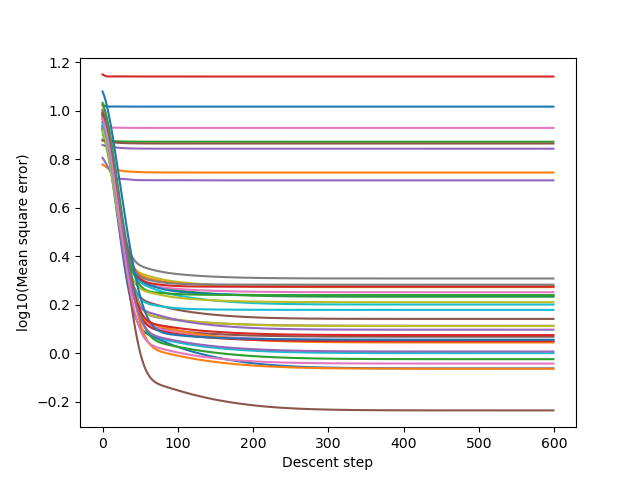

In [3]:
# Quantification
iq = ImageQuant2(img=imgs, roi=rois, cytbg=cytbg, membg=membg, pooling_rate=1, rol_ave=5, nfits=100)
iq.quantify()
iq.plot_losses(log=True)

In [4]:
# iq.plot_fits()

In [5]:
# iq.plot_quantification()

In [6]:
# Compile and save results
res = iq.compile_res()
res['Membrane signal'] *= calibration_factor
res.to_csv('../../data/ring_ph_quantification.csv')

In [7]:
# Perform summary quantification
res = pd.read_csv('../../data/ring_ph_quantification.csv')
cyts = res.groupby('EmbryoID').apply(lambda x: np.mean(x['Cytoplasmic signal']))
mems_tot = res.groupby('EmbryoID').apply(lambda x: np.mean(x['Membrane signal'])) 
mems_ant = res.groupby('EmbryoID').apply(lambda x: bounded_mean_1d(x['Membrane signal'], (0.25, 0.75))) 
mems_post = res.groupby('EmbryoID').apply(lambda x: bounded_mean_1d(x['Membrane signal'], (0.75, 0.25))) 
asis = [(p - a) / (a + p) for a, p in zip(mems_ant, mems_post)]
dosages = [dosage(i, r, 5) for i, r in zip(imgs, rois)]
totals = cyts + 0.174 * mems_tot
   
df_dict = {'Path': paths, 'Line': lines, 'Condition': conditions, 'Cyt': cyts, 'Mem_tot': mems_tot, 
           'Mem_ant': mems_ant, 'Mem_post': mems_post, 'ASI': asis, 'Dosage': dosages, 'Total': totals}
df = pd.DataFrame(df_dict)
df['Path'] = df['Path'].apply(lambda x: x[len(raw_data_path):])
df.to_csv('../../data/ring_ph_embryos.csv')

### Remove polar body

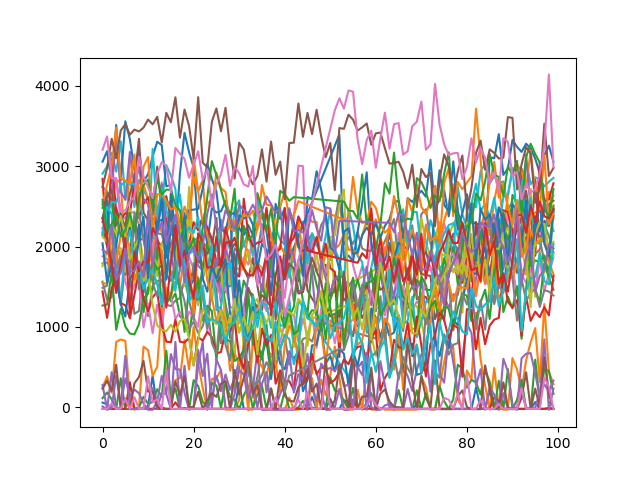

In [8]:
def nan_helper(y):
    return np.isnan(y), lambda z: z.nonzero()[0]

fig, ax = plt.subplots()
res = pd.read_csv('../../data/ring_ph_quantification.csv')
res_grouped = res.groupby('EmbryoID')
for (g, r), p, roi in zip(res_grouped, paths, rois):
    _mems = r['Membrane signal']
    mems = _mems.to_numpy()
    if os.path.exists(p + '/polar_body.txt'):
        polar_body = np.loadtxt(p + '/polar_body.txt')
        ind = int(100 * np.argmin(np.linalg.norm(roi - polar_body, axis=1)) / roi.shape[0])
        mems[ind-5:ind+5] = np.nan
        nans, x= nan_helper(mems)
        mems[nans] = np.interp(x(nans), x(~nans), mems[~nans])  
    ax.plot(mems)
    res.loc[_mems.index, 'Membrane signal'] = mems
res.to_csv('../../data/ring_ph_quantification_no_pb.csv')

In [9]:
# Perform summary quantification
res = pd.read_csv('../../data/ring_ph_quantification_no_pb.csv')
cyts = res.groupby('EmbryoID').apply(lambda x: np.mean(x['Cytoplasmic signal']))
mems_tot = res.groupby('EmbryoID').apply(lambda x: np.mean(x['Membrane signal'])) 
mems_ant = res.groupby('EmbryoID').apply(lambda x: bounded_mean_1d(x['Membrane signal'], (0.25, 0.75))) 
mems_post = res.groupby('EmbryoID').apply(lambda x: bounded_mean_1d(x['Membrane signal'], (0.75, 0.25))) 
asis = [(p - a) / (a + p) for a, p in zip(mems_ant, mems_post)]
dosages = [dosage(i, r, 5) for i, r in zip(imgs, rois)]
totals = cyts + 0.174 * mems_tot
   
df_dict = {'Path': paths, 'Line': lines, 'Condition': conditions, 'Cyt': cyts, 'Mem_tot': mems_tot, 
           'Mem_ant': mems_ant, 'Mem_post': mems_post, 'ASI': asis, 'Dosage': dosages, 'Total': totals}
df = pd.DataFrame(df_dict)
df['Path'] = df['Path'].apply(lambda x: x[len(raw_data_path):])
df.to_csv('../../data/ring_ph_embryos_no_pb.csv')